# Capstone 3 - Modeling

Objective:

Procedure:

Build pipeline

onehotencode categorical features
ordinal encode
standard scale numerical features

Results:

Conclusion:

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# sklearn libraries

from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import cross_validate


from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor


#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

import xgboost as xgb 

from sklearn.pipeline import Pipeline


In [3]:
!ls

Capstone 3 Data Wrangling Ed Gatdula.ipynb
Capstone 3 EDA Ed Gatdula.ipynb
Capstone 3 Modeling - Ed Gatdula.ipynb
Capstone 3 Modeling - TimeSeriesSplit Version.ipynb
Capstone 3 Modeling Notes.ipynb
Capstone 3 Modeling Tests.ipynb
Feature Union Worksheet.ipynb
capstone 3 project data
capstone_3
capstone_3_test_data
capstone_3_train_data
capstone_3_wrnglng_results
kaggle_submission2_random_forest
kaggle_submission3_xgboost
kaggle_submission4_randomforest_randomsearchcv
kaggle_submission5_randomforest_randomsearchcv
kaggle_submission_test


# Import Data


## Test set: OneHotEncode, OrdinalEncoder

In [3]:
# test set for kaggle prediction

df_test = pd.read_csv('./capstone_3_test_data')
print('df_test shape: {}\n'.format(df_test.shape))
df_test.info()
df_test.head()

df_test shape: (115064, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          115064 non-null  object 
 1   Store         115064 non-null  int64  
 2   Dept          115064 non-null  int64  
 3   IsHoliday     115064 non-null  int64  
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     115064 non-null  float64
 7   MarkDown2     115064 non-null  float64
 8   MarkDown3     115064 non-null  float64
 9   MarkDown4     115064 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           115064 non-null  float64
 12  Unemployment  115064 non-null  float64
 13  isocalendar   115064 non-null  object 
 14  Week          115064 non-null  int64  
 15  Type          115064 non-null  object 
 16  Size          115064 non-null  int64  
 17  cci_value     11506

,Date,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size,cci_value
0,2012-11-02,1,1,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
1,2012-11-02,1,2,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
2,2012-11-02,1,3,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
3,2012-11-02,1,4,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362
4,2012-11-02,1,5,0,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,"(2012, 44)",44,A,151315,99.00362


## Train Set: OneHotEncoder, OrdinalEncoder

Using OrdinalEncoder, OneHotEncoder, StandardScaler to:

1. prepare data for model use
2. prepare columntransformer in pipeline

In [4]:
# training data
df_train = pd.read_csv('./capstone_3_train_data')
print('df_train shape: {}\n'.format(df_train.shape))
df_train.info()
df_train.head()

df_train shape: (421570, 19)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          421570 non-null  object 
 1   Store         421570 non-null  int64  
 2   Dept          421570 non-null  int64  
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  isocalendar   421570 non-null  object 
 15  Week          421570 non-null  int64  
 16  Type          421570 non-null  object 
 17  Size          4215

,Date,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,isocalendar,Week,Type,Size,cci_value
0,2010-02-05,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
1,2010-02-05,1,2,50605.27,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
2,2010-02-05,1,3,13740.12,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
3,2010-02-05,1,4,39954.04,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324
4,2010-02-05,1,5,32229.38,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,"(2010, 5)",5,A,151315,98.22324


In [6]:
train_features = df_train.columns.to_list()
train_features

['Date',
 'Store',
 'Dept',
 'Weekly_Sales',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'isocalendar',
 'Week',
 'Type',
 'Size',
 'cci_value']

## Column Transformer Setup

In [172]:
# Nominal Categories: 'IsHoliday', 'Dept'

ohe=OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform(df_train[["IsHoliday",'Dept']])
ohe.categories_

# Ordinal Categories: 'Week','Type'
oe = OrdinalEncoder()
oe.fit_transform(df_train[['Week','Type']])
oe.categories_

# Standard Scaler for Numerical Features
scaler = StandardScaler()
scaler.fit_transform(df_train[['Temperature', 'Fuel_Price', 'MarkDown1',
                                  'MarkDown2', 'MarkDown3', 'MarkDown4',
                                  'MarkDown5', 'CPI', 'Unemployment', 'Size',
                                  'cci_value']])

# Instantiate make_column_transformer using standard scaler, onehotencoder, ordinalencoder

column_transform = make_column_transformer((scaler,['Temperature', 'Fuel_Price','MarkDown1',
                                                              'MarkDown2', 'MarkDown3', 'MarkDown4',
                                                              'MarkDown5', 'CPI', 'Unemployment', 'Size',
                                                              'cci_value']),
                                           (ohe,['IsHoliday','Dept']), 
                                           (oe,['Week','Type']),sparse_threshold=0)
column_transform

ColumnTransformer(sparse_threshold=0,
                  transformers=[('standardscaler', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'MarkDown1',
                                  'MarkDown2', 'MarkDown3', 'MarkDown4',
                                  'MarkDown5', 'CPI', 'Unemployment', 'Size',
                                  'cci_value']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['IsHoliday', 'Dept']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Week', 'Type'])])

In [9]:
#fit_transform make_column_transformer object
column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

array([[-0.96379804, -1.72083413, -0.42794328, ...,  0.        ,
         4.        ,  0.        ],
       [-0.96379804, -1.72083413, -0.42794328, ...,  0.        ,
         4.        ,  0.        ],
       [-0.96379804, -1.72083413, -0.42794328, ...,  0.        ,
         4.        ,  0.        ],
       ...,
       [-0.06721947,  1.13622153,  0.23607828, ...,  0.        ,
        42.        ,  1.        ],
       [-0.06721947,  1.13622153,  0.23607828, ...,  0.        ,
        42.        ,  1.        ],
       [-0.06721947,  1.13622153,  0.23607828, ...,  0.        ,
        42.        ,  1.        ]])

In [54]:
df_train.shape


(421570, 19)

# Linear Regression
## Linear Regression - TimeSeriesSplit, Manual Cross-Validation

In [10]:
# Column Transform df_train before split
X =df_train.drop(columns = ['Weekly_Sales'])
Y=df_train.Weekly_Sales
X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

#Time Based Splits
ts_cv = TimeSeriesSplit(n_splits=5)
all_splits = list(ts_cv.split(X, Y))
all_splits

#Loop through 5 splits, each time calculating MSE, R2

MSE_results = []
R2_results = []
MAE_results = []

for num in range(5):
    train_index , test_index = all_splits[num]

    #define train, test sets
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]
    print('train index: {} \n test index: {}\n'.format(train_index, test_index))
    
    #fit, predict
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    
    #score
    metric = mean_squared_error(y_test, y_pred)
    MSE_results.append(metric)
    
    metric2 = r2_score(y_test, y_pred)
    R2_results.append(metric2)
    
    metric3 = mean_absolute_error(y_pred,y_test)
    MAE_results.append(metric3)
    
    print('MSE: {} \n R2: {}\n MAE: {}\n'.format(metric, metric2, metric3))
    
print("Cross-Validation Scores:\n MSE: {}, R2: {}, MAE: {}".format(np.mean(MSE_results), np.mean(R2_results),
                                                         np.mean(MAE_results)))

train index: [    0     1     2 ... 70262 70263 70264] 
 test index: [ 70265  70266  70267 ... 140523 140524 140525]

MSE: 324000754.2885835 
 R2: 0.5541379530762023
 MAE: 11117.761883394573

train index: [     0      1      2 ... 140523 140524 140525] 
 test index: [140526 140527 140528 ... 210784 210785 210786]

MSE: 213120326.64475587 
 R2: 0.5505436938748478
 MAE: 9207.368946684197

train index: [     0      1      2 ... 210784 210785 210786] 
 test index: [210787 210788 210789 ... 281045 281046 281047]

MSE: 199697775.75773942 
 R2: 0.5825134080063902
 MAE: 10461.067971648241

train index: [     0      1      2 ... 281045 281046 281047] 
 test index: [281048 281049 281050 ... 351306 351307 351308]

MSE: 171316989.3971584 
 R2: 0.4944909928001926
 MAE: 9286.607933528692

train index: [     0      1      2 ... 351306 351307 351308] 
 test index: [351309 351310 351311 ... 421567 421568 421569]

MSE: 134651204.03547618 
 R2: 0.6368581826261748
 MAE: 8186.817128848152

Cross-Validation

## Linear Regression - GridSearchCV, PCA, TimeSeriesSplit 

Results:  PCA does not improve Linear Regression Root Mean Absolute Error

In [71]:
# define steps

# instantiate pipeline object

steps = [#('transform', column_transform),
        ('reducer', PCA()),
        ('linear', LinearRegression(normalize=True))]

pipe = Pipeline(steps)

# define gridsearch parameters dict

param_grid = {'reducer__n_components':[1,2,3,4,5,6,7]}

# split data into test train split
X = df_train.drop(columns = ['Weekly_Sales'])
Y = df_train['Weekly_Sales']
X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

# instantiate GridSearchCV object using pipeline, parameters dict
cv = TimeSeriesSplit(n_splits=5)
lr_grid_search = GridSearchCV(pipe, param_grid ,cv=cv, return_train_score = True)

# grid search fit
lr_grid_search.fit(X,Y)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('reducer', PCA()),
                                       ('linear',
                                        LinearRegression(normalize=True))]),
             param_grid={'reducer__n_components': [1, 2, 3, 4, 5, 6, 7]},
             return_train_score=True)

In [72]:
print(#grid_search.best_estimator_,
      grid_search.best_score_,
      #grid_search.cv_results_
     )

0.2590147106584233


In [73]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=5)
lr_scores = cross_validate(lr_grid_search, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
print(lr_scores['test_neg_mean_squared_error'])
print(lr_scores['test_r2'])
print(lr_scores['test_neg_mean_absolute_error'])



[-7.01395523e+08 -4.56818095e+08 -4.86671890e+08 -3.44259404e+08
 -3.64694540e+08]
[ 0.03479964  0.03660164 -0.01743241 -0.01581419  0.01645263]
[-18146.72739442 -14877.74060831 -16153.69709053 -13685.21827966
 -12951.72571218]


In [34]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# ElasticNet - GridSearchCV

In [47]:
# create steps

steps = [#('transform', column_transform),
         ('linear',ElasticNet())]

#instantiate pipeline object
pipe = Pipeline(steps)

# split df_train into test and train sets 
# Column Transform df_train before split
X =df_train.drop(columns = ['Weekly_Sales'])
Y=df_train.Weekly_Sales

X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

# GridSearchCV parameters
param_grid = {'linear__alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

scoring = {'R2': 'r2_score', 'MAE': 'mean_absolute_error', 'MSE': 'mean_squared_error'}

cv = TimeSeriesSplit(n_splits=4)
# instantiate GridSearchCV object using pipeline, parameters dict
elastic_grid_search = GridSearchCV(pipe, param_grid, cv=cv, return_train_score = True)
elastic_grid_search.fit(X, Y)



GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=Pipeline(steps=[('linear', ElasticNet())]),
             param_grid={'linear__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0]},
             return_train_score=True)

In [48]:
print("Best parameters: {}".format(elastic_grid_search.best_params_))

Best parameters: {'linear__alpha': 0.1}


In [50]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=4)
elastic_scores = cross_validate(grid_search, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1)
print(elastic_scores['test_neg_mean_squared_error'])
print(elastic_scores['test_r2'])
print(elastic_scores['test_neg_mean_absolute_error'])

[-4.99324090e+08 -3.85074665e+08 -3.37834879e+08 -2.43326815e+08]
[0.2313872  0.2502969  0.25669631 0.29767843]
[-15100.53674486 -13567.04520204 -13250.71541317 -10342.84359559]


# Random Forest Regression


## Random Forest Regressor - No Tuning, No TimeSeries Split

In [ ]:
# define training and test sets
# splitting dataset into X, y
y = df_train['Weekly_Sales']
X = df_train_select_encode
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# instantiate randomforestregressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# predict using X_test.  evaluate regression model performance
name_ = "Random Forest"
y_pred = forest.predict(X_test)
params_ = forest.get_params
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)

print("RandomForest training set score:{:.2f}".format(
    forest.score(X_train, y_train)))
print("RandomForest best parameters:{}".format(params_))
print("RandomForest test set score:{:.2f}".format(
    forest.score(X_test, y_test)))
print("RMSE Score:{}".format(mean_squared_error(y_test, y_pred, squared=False)))
"""
# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': name_, 'parameters': params_, 'train set score': test_score,
                                'test set score': train_score,

## Random Forest Regressor - TimeSeriesSplit, CV the hard way

In [ ]:
# Column Transform df_train before split
X =df_train.drop(columns = ['Weekly_Sales'])
Y=df_train.Weekly_Sales

X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

#Time Based Splits
ts_cv = TimeSeriesSplit(n_splits=5)
all_splits = list(ts_cv.split(X, Y))
all_splits

#Loop through 5 splits, each time calculating MSE, R2

MSE_results = []
R2_results = []
MAE_results = []

for num in range(5):
    train_index , test_index = all_splits[num]

    #define train, test sets
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]
    print('train index: {} \n test index: {}\n'.format(train_index, test_index))
    
    #fit, predict
    model = RandomForestRegressor(n_jobs=-1)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    #score
    metric = mean_squared_error(y_test, y_pred)
    MSE_results.append(metric)
    
    metric2 = r2_score(y_test, y_pred)
    R2_results.append(metric2)
    
    metric3 = mean_absolute_error(y_pred,y_test)
    MAE_results.append(metric3)
    
    print('MSE: {} \n R2: {}\n MAE: {}\n'.format(metric, metric2, metric3))
    
print("Cross-Validation Scores:\n MSE: {}, R2: {}, MAE: {}".format(np.mean(MSE_results), np.mean(R2_results),
                                                         np.mean(MAE_results)))

# Random Forest Regressor GridSearchCV

In [54]:
# GridSearchCV Lasso Regressor using column_transform

# create steps

steps = [#('transform', column_transform),
         ('RandomForest', RandomForestRegressor(n_jobs=-1))]

#instantiate pipeline object
pipe = Pipeline(steps)

# split df_train into test and train sets 
X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))
#X = df_train.drop(columns = ['Weekly_Sales'])
Y = df_train['Weekly_Sales']        
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

# GridSearchCV parameters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 11)]
max_depth.append(None)
#max_depth.append(None)

param_grid = {'RandomForest__n_estimators': n_estimators,
             #  'max_features': max_features,
               'RandomForest__max_depth': max_depth}
             #  'min_samples_split': min_samples_split,
             #  'min_samples_leaf': min_samples_leaf,
             #  'bootstrap': bootstrap}

print(param_grid)

tscv = TimeSeriesSplit(n_splits=5)
rf_random = RandomizedSearchCV(pipe, param_distributions = param_grid, n_iter = 50, cv = tscv, verbose=1)

# Fit the random search model
rf_random.fit(X,Y)




{'RandomForest__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 'RandomForest__max_depth': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]}
Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=Pipeline(steps=[('RandomForest',
                                              RandomForestRegressor(n_jobs=-1))]),
                   n_iter=50,
                   param_distributions={'RandomForest__max_depth': [1, 1, 2, 3,
                                                                    4, 5, 6, 7,
                                                                    8, 9, 10,
                                                                    None],
                                        'RandomForest__n_estimators': [1, 2, 3,
                                                                       4, 5, 6,
                                                                       7, 8, 9,
                                                                       10, 11,
                                                                       12, 13,
                   

In [55]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=4)
rf_scores = cross_validate(rf_random, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1)
print(rf_scores['test_neg_mean_squared_error'])
print(rf_scores['test_r2'])
print(rf_scores['test_neg_mean_absolute_error'])

[-1.99191420e+08 -2.75168339e+08 -2.30033307e+08 -1.28038430e+08]
[0.69338336 0.46427388 0.49388113 0.63043879]
[-7031.50851195 -9856.82949878 -8811.19889254 -5295.15467241]


In [ ]:
# Kaggle Predictions
y_pred = rf_random.predict(df_test)

df_submission = pd.DataFrame()
df_submission['id'] = df_test['Store'].astype('str') + "_" + df_test['Dept'].astype('str') + "_" + df_test['Date'].astype(str)
df_submission['Weekly_Sales'] = y_pred
df_submission

# write submission dataframe to file
df_submission.to_csv('kaggle_submission5_randomforest_randomsearchcv', index=False)

# XGB Boost Regressor 
## No Tuning

In [22]:
# Column Transform df_train before split
X =df_train.drop(columns = ['Weekly_Sales'])
Y=df_train.Weekly_Sales

X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

#Time Based Splits
ts_cv = TimeSeriesSplit(n_splits=5)
all_splits = list(ts_cv.split(X, Y))
all_splits

#Loop through 5 splits, each time calculating MSE, R2

MSE_results = []
R2_results = []
MAE_results = []

for num in range(5):
    train_index , test_index = all_splits[num]

    #define train, test sets
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]
    print('train index: {} \n test index: {}\n'.format(train_index, test_index))
    
    #fit, predict
    model = GradientBoostingRegressor(n_estimators=50, max_depth=10, random_state=0)
#                  'xgb__n_estimators' : np.linspace(10,100,10),
#                  'xgb__max_depth'    : [4,6,8,10]
    
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    #score
    metric = mean_squared_error(y_test, y_pred)
    MSE_results.append(metric)
    
    metric2 = r2_score(y_test, y_pred)
    R2_results.append(metric2)
    
    metric3 = mean_absolute_error(y_pred,y_test)
    MAE_results.append(metric3)
    
    print('MSE: {} \n R2: {}\n MAE: {}\n'.format(metric, metric2, metric3))
    
print("Cross-Validation Scores:\n MSE: {}, R2: {}, MAE: {}".format(np.mean(MSE_results), np.mean(R2_results),
                                                         np.mean(MAE_results)))

train index: [    0     1     2 ... 70262 70263 70264] 
 test index: [ 70265  70266  70267 ... 140523 140524 140525]

MSE: 237573303.09018126 
 R2: 0.6730719981105662
 MAE: 9445.36615030448

train index: [     0      1      2 ... 140523 140524 140525] 
 test index: [140526 140527 140528 ... 210784 210785 210786]

MSE: 148607570.12029877 
 R2: 0.6865967194211432
 MAE: 7553.955566525546

train index: [     0      1      2 ... 210784 210785 210786] 
 test index: [210787 210788 210789 ... 281045 281046 281047]

MSE: 145878831.8852291 
 R2: 0.6950268667906647
 MAE: 8444.385104555688

train index: [     0      1      2 ... 281045 281046 281047] 
 test index: [281048 281049 281050 ... 351306 351307 351308]

MSE: 190761055.7200775 
 R2: 0.4371169361032269
 MAE: 9026.715303125153

train index: [     0      1      2 ... 351306 351307 351308] 
 test index: [351309 351310 351311 ... 421567 421568 421569]

MSE: 99073158.24661352 
 R2: 0.7328088746301824
 MAE: 6825.0118240033535

Cross-Validation Sc

## XGB Boost Regressor - TimeSeriesSplit, GridSearchCV

In [55]:
reg = GradientBoostingRegressor(random_state=0)
reg.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [68]:
# GridSearchCV Example

# GridSearchCV xgbboost Regressor using column_transform

# create steps
steps = [#('transform', column_transform),
        ('xgb', GradientBoostingRegressor())]


#instantiate pipeline object
pipe = Pipeline(steps)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {#'xgb__learning_rate': [0.01,0.02,0.03,0.04],
                  #'xgb__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'xgb__n_estimators' : [10,20,30],
                  'xgb__max_depth'    : [4,6,8,10]
                 }

# split df_train into test and train sets 
X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))
#X = df_train.drop(columns = ['Weekly_Sales'])
Y = df_train['Weekly_Sales']        


# Perform grid search: grid_mse
cv = TimeSeriesSplit(n_splits=4)
xgb_gridsearch = GridSearchCV(pipe, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=cv, verbose=1,
                       n_jobs=-1)
#GridSearchCV(pipe, param_grid, cv=5, return_train_score = True)

# Fit grid_mse to the data
xgb_gridsearch.fit(X,Y)


Fitting 4 folds for each of 12 candidates, totalling 48 fits


/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'xgb__max_depth': 10, 'xgb__n_estimators': 30}
Lowest RMSE found:  13845.771637345691


In [76]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=5)
xgb_scores = cross_validate(lr_grid_search, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'))
print(xgb_scores['test_neg_mean_squared_error'])
print(xgb_scores['test_r2'])
print(xgb_scores['test_neg_mean_absolute_error'])

[-7.01395523e+08 -4.56818095e+08 -4.86671890e+08 -3.44259404e+08
 -3.64694540e+08]
[ 0.03479964  0.03660164 -0.01743241 -0.01581419  0.01645263]
[-18146.72739442 -14877.74060831 -16153.69709053 -13685.21827966
 -12951.72571218]


In [34]:
#Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 2 folds for each of 40 candidates, totalling 80 fits


/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 452, in fit
    self._init_state()
  File "/Users/marshallbanana/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 313, in _init_state
    self.estimators_ = np.empty((self.n_estimators, self.loss_.K),
TypeError: 'numpy.float64' object ca

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
# Kaggle Predictions
y_pred = grid_mse.predict(test_kaggle)


df_submission = pd.DataFrame()
df_submission['id'] = df_test['Store'].astype('str') + "_" + df_test['Dept'].astype('str') + "_" + df_test['Date'].astype(str)
df_submission['Weekly_Sales'] = y_pred

df_submission.to_csv('kaggle_submission3_xgboost', index=False)

# HistGradientBoosting

## HistGradientBoosting- TimeSeriesSplit, Manual Cross-Validation

In [18]:
# Column Transform df_train before split
X =df_train.drop(columns = ['Weekly_Sales'])
Y=df_train.Weekly_Sales

X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))

#Time Based Splits
ts_cv = TimeSeriesSplit(n_splits=5)
all_splits = list(ts_cv.split(X, Y))
all_splits

#Loop through 5 splits, each time calculating MSE, R2

MSE_results = []
R2_results = []
MAE_results = []

for num in range(5):
    train_index , test_index = all_splits[num]

    #define train, test sets
    x_train = X[train_index]
    y_train = Y[train_index]
    x_test = X[test_index]
    y_test = Y[test_index]
    print('train index: {} \n test index: {}\n'.format(train_index, test_index))
    
    #fit, predict
    model = HistGradientBoostingRegressor(random_state=0)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    #score
    metric = mean_squared_error(y_test, y_pred)
    MSE_results.append(metric)
    
    metric2 = r2_score(y_test, y_pred)
    R2_results.append(metric2)
    
    metric3 = mean_absolute_error(y_pred,y_test)
    MAE_results.append(metric3)
    
    print('MSE: {} \n R2: {}\n MAE: {}\n'.format(metric, metric2, metric3))
    
print("Cross-Validation Scores:\n MSE: {}, R2: {}, MAE: {}".format(np.mean(MSE_results), np.mean(R2_results),
                                                         np.mean(MAE_results)))

train index: [    0     1     2 ... 70262 70263 70264] 
 test index: [ 70265  70266  70267 ... 140523 140524 140525]

MSE: 303393357.18071157 
 R2: 0.5824960853788933
 MAE: 9427.49528922873

train index: [     0      1      2 ... 140523 140524 140525] 
 test index: [140526 140527 140528 ... 210784 210785 210786]

MSE: 148437436.54445586 
 R2: 0.6869555195869935
 MAE: 6603.540834104873

train index: [     0      1      2 ... 210784 210785 210786] 
 test index: [210787 210788 210789 ... 281045 281046 281047]

MSE: 151633839.11226693 
 R2: 0.6829954941577048
 MAE: 7712.72292451731

train index: [     0      1      2 ... 281045 281046 281047] 
 test index: [281048 281049 281050 ... 351306 351307 351308]

MSE: 187710688.8662141 
 R2: 0.4461177242055496
 MAE: 9076.65382786228

train index: [     0      1      2 ... 351306 351307 351308] 
 test index: [351309 351310 351311 ... 421567 421568 421569]

MSE: 120736358.38858269 
 R2: 0.6743852316628686
 MAE: 7421.971923894877

Cross-Validation Sco

## HistGradientBoost GridSearch

In [61]:
# GridSearchCV Example

# GridSearchCV xgbboost Regressor using column_transform

# create steps
steps = [#('transform', column_transform),
        ('hist', HistGradientBoostingRegressor())]


#instantiate pipeline object
pipe = Pipeline(steps)

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {#'xgb__learning_rate': [0.01,0.02,0.03,0.04],
                  #'xgb__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'hist__min_samples_leaf' : [30,40,50,60,70,80],
                  'hist__max_depth'    : [4,6,8,10]
                 }

# split df_train into test and train sets 
X = column_transform.fit_transform(df_train.drop(columns = ['Weekly_Sales']))
#X = df_train.drop(columns = ['Weekly_Sales'])
Y = df_train['Weekly_Sales']        


# Perform grid search: grid_mse
cv = TimeSeriesSplit(n_splits=5)
hist_gridsearch = GridSearchCV(pipe, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=cv,
                               verbose=1)

# Fit hist_gridsearch to the data
hist_gridsearch.fit(X,Y)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('hist',
                                        HistGradientBoostingRegressor())]),
             param_grid={'hist__max_depth': [4, 6, 8, 10],
                         'hist__min_samples_leaf': [30, 40, 50, 60, 70, 80]},
             scoring='neg_mean_squared_error', verbose=1)

In [63]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=5)
hist_scores = cross_validate(hist_gridsearch, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1)
print(hist_scores['test_neg_mean_squared_error'])
print(hist_scores['test_r2'])
print(hist_scores['test_neg_mean_absolute_error'])




[-3.51398801e+08 -1.49237630e+08 -1.41225078e+08 -1.83557574e+08
 -9.59487842e+07]
[0.51643511 0.68526797 0.70475597 0.45837242 0.74123502]
[-10444.87155189  -6861.29768179  -7746.2374835   -9054.95080959
  -6735.03877862]


# Feature Engineering to Improve Predictions

General Procedure:

1.  Create MarkDown_log Feature.  Apply logrithmic function to all non zero MarkDown values.
2.  Drop MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 features for HistGradientBoost GridSearch.
3.  Drop MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 features for ElasticNet GridSearch.

Engineered Features Summary:

|    | model              |   R2 |   Mean Squared Error, MSE |   Mean Absolute Error, MAE |
|---:|:-------------------|-----:|--------------------------:|---------------------------:|
|  0 | ElasticNet         | 0.26 |               3.6639e+08  |                   13065.3  |
|  1 | ElasticNet+        | 0.27 |               3.52625e+08 |                   12828.1  |
|  2 | HistGradientBoost  | 0.62 |               1.84274e+08 |                    8168.48 |
|  3 | HistGradientBoost+ | 0.63 |               1.78486e+08 |                    7996.65 |

ElasticNet Metric Effects:  
*  3.8% increase Coefficient of Determination. 
*  3.8% reduction Mean Squared Error.  
*  1.8% reduction Mean Absolute Error.  
    
HistGradientBoost Metric Effects:  
*  0.016% increase Coefficient of Determination.  
*  3.0% reduction Mean Square Error.  
*  2.0% reudction Mean Absolute Error.  




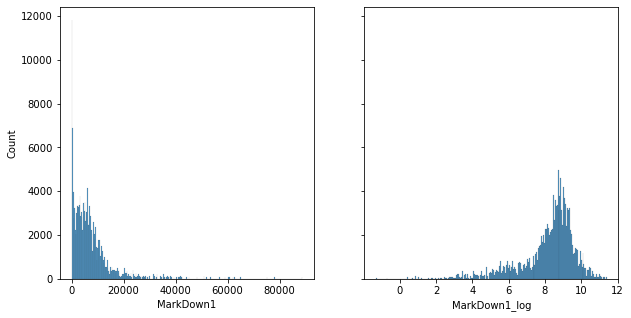

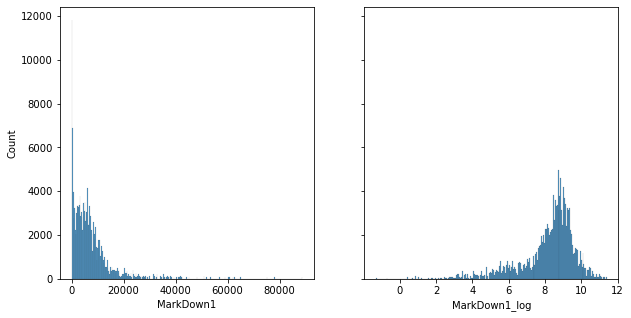

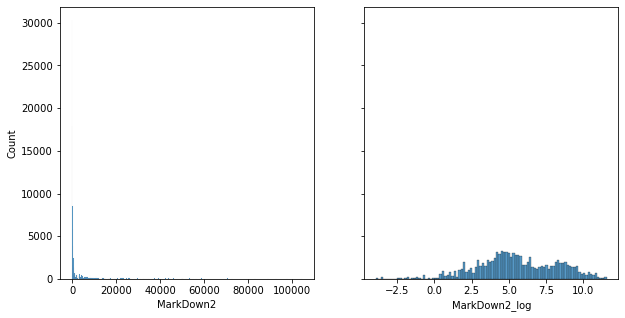

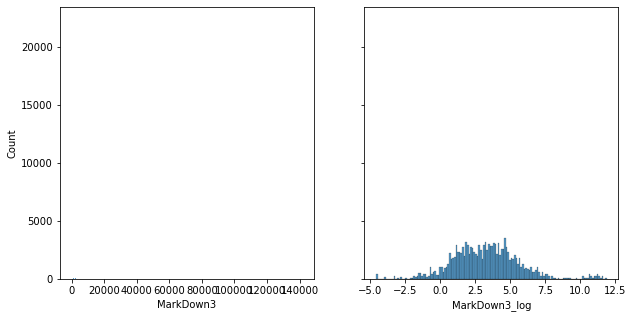

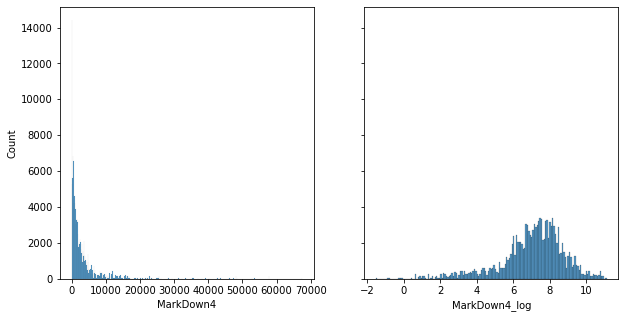

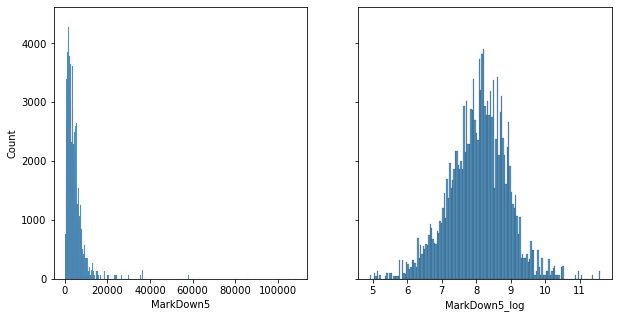

In [690]:
# Create new features by apply logrithmic function to all non zero MarkDown values.  By doing so, the distribution
# MarkDown values will become more normalized.

list = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
names = [x +"_log" for x in list]

# create new columns containing log values of respective MarkDowns

for x_, y_ in zip(names, list):
#   print(x_, y_)
    df_train[x_]=[np.log(x) if x > 0 else 0 for x in df_train[y_]]

df_train    

# plot function to compare new features.

def compare_plot(before, after):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True)

    sns.histplot(data=df_train[df_train[before]!=0], x=df_train[df_train[before]!=0][before], ax=ax1)
    #ax1.set(xlabel="High End", ylim=(0,10000), title="Salaries")


    sns.histplot(data=df_train[df_train[after]!=0],
    x=df_train[df_train[after]!=0][after], ax=ax2)

    plt.show()
    
compare_plot('MarkDown1', 'MarkDown1_log')

for x_, y_ in zip(names, list):
    compare_plot(y_, x_)

In [ ]:
# Use log transformed values in place of original MarkDown Features

In [670]:
# Nominal Categories: 'IsHoliday', 'Dept'

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit_transform(df_train[["IsHoliday", 'Dept']])
ohe.categories_

# Ordinal Categories: 'Week','Type'
oe = OrdinalEncoder()
oe.fit_transform(df_train[['Week', 'Type']])
oe.categories_

# Standard Scaler for Numerical Features
scaler = StandardScaler()
scaler.fit_transform(df_train[['Temperature', 'Fuel_Price', 'MarkDown1_log', 'MarkDown2_log', "MarkDown3_log",
                               "MarkDown4_log", "MarkDown5_log", 'CPI', 'Unemployment', 'Size',
                               'cci_value']])

# Instantiate make_column_transformer using standard scaler, onehotencoder, ordinalencoder

column_transform = make_column_transformer((scaler, ['Temperature', 'Fuel_Price', 'MarkDown1_log', 'MarkDown2_log', "MarkDown3_log",
                                                     "MarkDown4_log", "MarkDown5_log", 'CPI', 'Unemployment', 'Size',
                                                     'cci_value']),
                                           (ohe, ['IsHoliday', 'Dept']),
                                           (oe, ['Week', 'Type']), sparse_threshold=0)
column_transform

ColumnTransformer(sparse_threshold=0,
                  transformers=[('standardscaler', StandardScaler(),
                                 ['Temperature', 'Fuel_Price', 'MarkDown1_log',
                                  'MarkDown2_log', 'MarkDown3_log',
                                  'MarkDown4_log', 'MarkDown5_log', 'CPI',
                                  'Unemployment', 'Size', 'cci_value']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['IsHoliday', 'Dept']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['Week', 'Type'])])

## HistGradientBoosting GridSearch with Engineered Feature

In [674]:
# GridSearchCV HistGradientBoosting Regressor using column_transform

# create steps
steps = [  # ('transform', column_transform),
    ('hist', HistGradientBoostingRegressor())]


# instantiate pipeline object
pipe = Pipeline(steps)

# Create the parameter grid: gbm_param_grid
hist_param_grid = {#'xgb__learning_rate': [0.01,0.02,0.03,0.04],
                  #'xgb__subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'hist__min_samples_leaf' : [30,40,50,60,70,80],
                  'hist__max_depth'    : [4,6,8,10]
                 }



# split df_train into test and train set
X = column_transform.fit_transform(df_train.drop(columns=['Weekly_Sales','MarkDown1', 'MarkDown2',
                                                          'MarkDown3', 'MarkDown4','MarkDown5',"MarkDown_Total"]))
#X = df_train.drop(columns = ['Weekly_Sales'])
Y = df_train['Weekly_Sales']


# Perform grid search: grid_mse
cv = TimeSeriesSplit(n_splits=4)
hist_feature_gridsearch = GridSearchCV(pipe, param_grid=hist_param_grid, scoring='neg_mean_squared_error', cv=cv,
                              verbose=1, n_jobs=-1)
#GridSearchCV(pipe, param_grid, cv=5, return_train_score = True)

# Fit grid_mse to the data
hist_feature_gridsearch.fit(X, Y)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=Pipeline(steps=[('hist',
                                        HistGradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'hist__max_depth': [4, 6, 8, 10],
                         'hist__min_samples_leaf': [30, 40, 50, 60, 70, 80]},
             scoring='neg_mean_squared_error', verbose=1)

In [676]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=5)
hist_feature_scores = cross_validate(hist_feature_gridsearch, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1)
print(hist_feature_scores['test_neg_mean_squared_error'])
print(hist_feature_scores['test_r2'])
print(hist_feature_scores['test_neg_mean_absolute_error'])



[-3.27367783e+08 -1.52736385e+08 -1.44286897e+08 -1.67094852e+08
 -1.00944790e+08]
[0.54950454 0.67788933 0.69835495 0.50694935 0.72776126]
[-9878.55731595 -6816.54471817 -7763.29054135 -8673.82312361
 -6851.05018341]


## ElasticNet GridSearchCV using Engineered Feature

In [683]:
# create steps

steps = [#('transform', column_transform),
         ('linear',ElasticNet())]

#instantiate pipeline object
pipe = Pipeline(steps)

# split df_train into test and train sets 
# Column Transform df_train before split
# split df_train into test and train set
X = column_transform.fit_transform(df_train.drop(columns=['Weekly_Sales','MarkDown1', 'MarkDown2',
                                                          'MarkDown3', 'MarkDown4','MarkDown5',"MarkDown_Total"]))

Y = df_train['Weekly_Sales']

# GridSearchCV parameters
param_grid = {'linear__alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

scoring = {'R2': 'r2_score', 'MAE': 'mean_absolute_error', 'MSE': 'mean_squared_error'}

cv = TimeSeriesSplit(n_splits=5)
# instantiate GridSearchCV object using pipeline, parameters dict
elasticnet_feature_gridsearch = GridSearchCV(pipe, param_grid, cv=cv, return_train_score = True)
elasticnet_feature_gridsearch.fit(X, Y)


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('linear', ElasticNet())]),
             param_grid={'linear__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0]},
             return_train_score=True)

In [684]:
# cross validate gridsearchcv model

cv = TimeSeriesSplit(n_splits=5)
elasticnet_feature_scores = cross_validate(elasticnet_feature_gridsearch, X, Y, cv=cv,
                        scoring=('r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'), n_jobs=-1)
print(elasticnet_feature_scores['test_neg_mean_squared_error'])
print(elasticnet_feature_scores['test_r2'])
print(elasticnet_feature_scores['test_neg_mean_absolute_error'])



[-5.53766776e+08 -3.37021514e+08 -3.68602682e+08 -2.42816521e+08
 -2.60915767e+08]
[0.23795366 0.2892445  0.22940215 0.28351567 0.29633436]
[-15931.34295373 -12291.74626177 -14168.3220789  -10803.85130496
 -10945.21752919]


## Comparing Model Improvement with Engineered Feature

In [ ]:
# Comparison of Tuned Models Performance

# build dataframe: model name, r2, mae, mse features
names = ['ElasticNet', 'ElasticNet+', 'HistGradientBoost', 'HistGradientBoost+']
scores_list = [elastic_scores,elasticnet_feature_scores,hist_scores,hist_feature_scores]

df_scores = pd.DataFrame()
for x, y in zip(names, scores_list):
    df_ = pd.DataFrame(scores(y))
 
    df_['model'] = x
    
    df_scores= df_scores.append(df_)
    
    #print(df_)

df_scores=df_scores.reset_index(drop=True)
df_scores = df_scores[['model','test_r2',
 'test_neg_mean_squared_error',
 'test_neg_mean_absolute_error']]
df_scores = df_scores.rename(columns={'test_r2': 'R2', 'test_neg_mean_squared_error': 'Mean Squared Error, MSE',
                   'test_neg_mean_absolute_error':'Mean Absolute Error, MAE'})
df_scores

# Model Performance Metrics Comparison

Summary-

|    | model             |        R2 |   Mean Squared Error, MSE |   Mean Absolute Error, MAE |
|---:|:------------------|----------:|--------------------------:|---------------------------:|
|  0 | Linear Regression | 0.0242201 |               4.70768e+08 |                   15163    |
|  1 | ElasticNet        | 0.259015  |               3.6639e+08  |                   13065.3  |
|  2 | Random Forest     | 0.570494  |               2.08108e+08 |                    7748.67 |
|  3 | XGBoost           | 0.0242201 |               4.70768e+08 |                   15163    |
|  4 | HistGradientBoost | 0.621213  |               1.84274e+08 |                    8168.48 |

R2, Coefficient of Determination.  Proportion of target variance explained by model. Values range from 0 to 1.  Higher values indicates improved model accuray (in order of best to worst):
- HistGradientBoost Model 
- Random Forest 
- ElasticNet 
- XGBoost 
- Linear Regression 

Mean Squared Error. Variation of the residuals.  Lower values indicate improved model precision.  (in order of best to worst): 
- HistGradientBoost Model 
- Random Forest 
- ElasticNet 
- Linear Regression 
- XGBoost 

Mean Absolute Error.  Average of residuals.  Lower value indicates more accurate model(in order of best to worst).  In order of best to worst:
- HistGradientBoost Model 
- Random Forest 
- ElasticNet 
- Linear Regression 
- XGBoost 



In [677]:
#write a function that returns scores
list = {}
def scores(name):

    keys = ['test_r2','test_neg_mean_squared_error', 'test_neg_mean_absolute_error']
    for item in keys:
        #print("{} average: {:.3f}".format(item, np.mean(np.abs(name[item])) ))
        z = list.update({item:[np.round(np.mean(np.abs(name[item])),2)]})

    return list

scores(lr_scores)

{'test_r2': [0.02],
 'test_neg_mean_squared_error': [470767890.33],
 'test_neg_mean_absolute_error': [15163.02]}

## Comparing Tuned Model Performance Metrics

In [664]:
# Comparison of Tuned Models Performance

# build dataframe: model name, r2, mae, mse features
names = ['Linear Regression', 'ElasticNet', 'Random Forest', 'XGBoost', 'HistGradientBoost']
scores_list = [lr_scores, elastic_scores, rf_scores, xgb_scores, hist_scores]

df_scores = pd.DataFrame()
for x, y in zip(names, scores_list):
    df_ = pd.DataFrame(scores(y))
 
    df_['model'] = x
    
    df_scores= df_scores.append(df_)
    
    #print(df_)

df_scores=df_scores.reset_index(drop=True)
df_scores = df_scores[['model','test_r2',
 'test_neg_mean_squared_error',
 'test_neg_mean_absolute_error']]
df_scores = df_scores.rename(columns={'test_r2': 'R2', 'test_neg_mean_squared_error': 'Mean Squared Error, MSE',
                   'test_neg_mean_absolute_error':'Mean Absolute Error, MAE'})
df_scores

,model,R2,"Mean Squared Error, MSE","Mean Absolute Error, MAE"
0,Linear Regression,0.024220,4.707679e+08,15163.021817
1,ElasticNet,0.259015,3.663901e+08,13065.285239
2,Random Forest,0.570494,2.081079e+08,7748.672894
3,XGBoost,0.024220,4.707679e+08,15163.021817
4,HistGradientBoost,0.621213,1.842736e+08,8168.479261


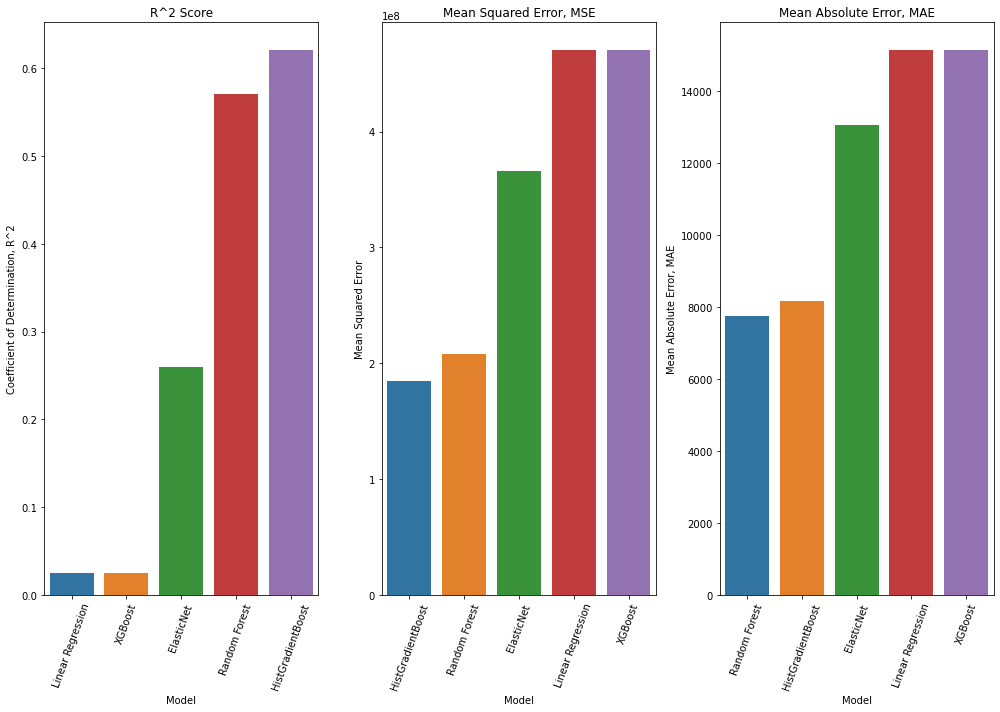

In [665]:
# Create three plots to comparison model performance metrics
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,10))


sns.barplot(data=df_scores, x='model', y='R2', 
            order = df_scores.sort_values('R2').model, ax=ax1)
ax1.set(xlabel ='Model', ylabel ='Coefficient of Determination, R^2',
       title ='R^2 Score')
ax1.tick_params(axis = 'x',labelrotation=70)

sns.barplot(data=df_scores, x='model', y='Mean Squared Error, MSE',
            order = df_scores.sort_values('Mean Squared Error, MSE').model, ax=ax2)
ax2.set(xlabel ='Model', ylabel ='Mean Squared Error',
       title ='Mean Squared Error, MSE')
ax2.tick_params(axis = 'x', labelrotation=70)

sns.barplot(data=df_scores, x='model', y='Mean Absolute Error, MAE',
            order = df_scores.sort_values('Mean Absolute Error, MAE').model, ax=ax3)
ax3.set(xlabel ='Model', ylabel ='Mean Absolute Error, MAE',
       title ='Mean Absolute Error, MAE')
ax3.tick_params(axis = 'x',labelrotation=70)

plt.tight_layout()
plt.show()

In [675]:
### Markdown Table of performance metrics

print(df_scores.to_markdown())

|    | model             |        R2 |   Mean Squared Error, MSE |   Mean Absolute Error, MAE |
|---:|:------------------|----------:|--------------------------:|---------------------------:|
|  0 | Linear Regression | 0.0242201 |               4.70768e+08 |                   15163    |
|  1 | ElasticNet        | 0.259015  |               3.6639e+08  |                   13065.3  |
|  2 | Random Forest     | 0.570494  |               2.08108e+08 |                    7748.67 |
|  3 | XGBoost           | 0.0242201 |               4.70768e+08 |                   15163    |
|  4 | HistGradientBoost | 0.621213  |               1.84274e+08 |                    8168.48 |


In [686]:
# Comparison of Tuned Models Performance

# build dataframe: model name, r2, mae, mse features
names = ['ElasticNet', 'ElasticNet+', 'HistGradientBoost', 'HistGradientBoost+']
scores_list = [elastic_scores,elasticnet_feature_scores,hist_scores,hist_feature_scores]

df_scores = pd.DataFrame()
for x, y in zip(names, scores_list):
    df_ = pd.DataFrame(scores(y))
 
    df_['model'] = x
    
    df_scores= df_scores.append(df_)
    
    #print(df_)

df_scores=df_scores.reset_index(drop=True)
df_scores = df_scores[['model','test_r2',
 'test_neg_mean_squared_error',
 'test_neg_mean_absolute_error']]
df_scores = df_scores.rename(columns={'test_r2': 'R2', 'test_neg_mean_squared_error': 'Mean Squared Error, MSE',
                   'test_neg_mean_absolute_error':'Mean Absolute Error, MAE'})
df_scores

,model,R2,"Mean Squared Error, MSE","Mean Absolute Error, MAE"
0,ElasticNet,0.26,3.663901e+08,13065.29
1,ElasticNet+,0.27,3.526247e+08,12828.10
2,HistGradientBoost,0.62,1.842736e+08,8168.48
3,HistGradientBoost+,0.63,1.784861e+08,7996.65


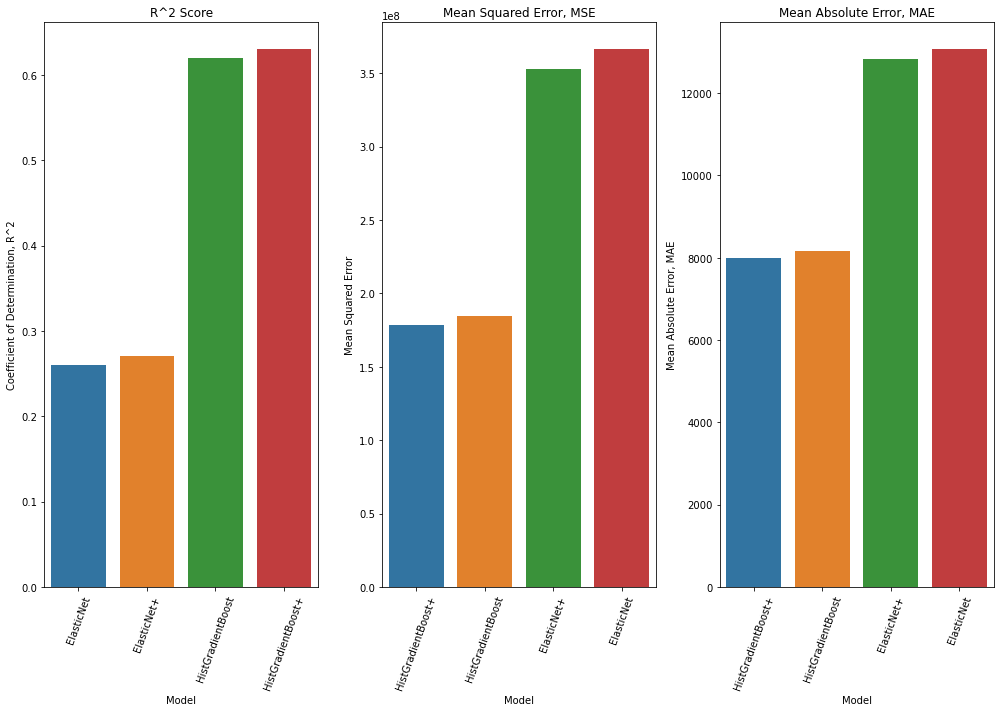

In [687]:
# Create three plots to comparison model performance metrics
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,10))


sns.barplot(data=df_scores, x='model', y='R2', 
            order = df_scores.sort_values('R2').model, ax=ax1)
ax1.set(xlabel ='Model', ylabel ='Coefficient of Determination, R^2',
       title ='R^2 Score')
ax1.tick_params(axis = 'x',labelrotation=70)

sns.barplot(data=df_scores, x='model', y='Mean Squared Error, MSE',
            order = df_scores.sort_values('Mean Squared Error, MSE').model, ax=ax2)
ax2.set(xlabel ='Model', ylabel ='Mean Squared Error',
       title ='Mean Squared Error, MSE')
ax2.tick_params(axis = 'x', labelrotation=70)

sns.barplot(data=df_scores, x='model', y='Mean Absolute Error, MAE',
            order = df_scores.sort_values('Mean Absolute Error, MAE').model, ax=ax3)
ax3.set(xlabel ='Model', ylabel ='Mean Absolute Error, MAE',
       title ='Mean Absolute Error, MAE')
ax3.tick_params(axis = 'x',labelrotation=70)

plt.tight_layout()
plt.show()

In [688]:
### Markdown Table of performance metrics

print(df_scores.to_markdown())

|    | model              |   R2 |   Mean Squared Error, MSE |   Mean Absolute Error, MAE |
|---:|:-------------------|-----:|--------------------------:|---------------------------:|
|  0 | ElasticNet         | 0.26 |               3.6639e+08  |                   13065.3  |
|  1 | ElasticNet+        | 0.27 |               3.52625e+08 |                   12828.1  |
|  2 | HistGradientBoost  | 0.62 |               1.84274e+08 |                    8168.48 |
|  3 | HistGradientBoost+ | 0.63 |               1.78486e+08 |                    7996.65 |
